<a href="https://colab.research.google.com/github/sasongko8888/wpu-resolusi/blob/main/Practice_1_Structured_Dataset_Plotting_Supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction Google Colab

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Apa itu Google Colab?</h1>

Colaboratory, atau disingkat "Colab", memungkinkan Anda untuk menulis dan mengeksekusi Python di browser Anda, dengan

- Tidak perlu konfigurasi
- Akses gratis ke GPU
- Berbagi dengan mudah


In [ ]:
# Cek versi python
!python --version

Python 3.9.16


# Dataset Terstruktur
Jenis format data yang umum digunakan:
   - **CSV**: Format file sederhana yang digunakan untuk menyimpan data tabel.
   - **JSON**: Terutama digunakan untuk mengirimkan data antara server dan aplikasi web.
   - **Excel**: File spreadsheet yang dibuat dengan Microsoft Excel.
   - **XML**: Terutama digunakan untuk menyimpan atau mengangkut data dalam aplikasi HTML. 

# Pandas
![image.png](https://media.chinaeducationaltours.com/image/panda/panda-1080.jpg)
- *Library* Software yang ditulis untuk bahasa pemrograman Python untuk analisis data
- Mengakses dan memanipulasi data dalam DataFrame dan Series
- Menyediakan struktur dan operasi data untuk memanipulasi tabel numerik dan kategorik
- Pandas dapat membaca data dari berbagai format seperti  **CSV**, **TSV**, **MS Excel**, dll.

### Kegunaan Pandas:

- Manipulasi data:
  - *Extract column*(kolom), *Extract row*(baris)
  - Grouping and Aggregation 
  - *Filtering* (Memilih baris berdasarkan suatu kriteria tertentu)
  - Joining (Penggabungan antara dua atau lebih *DataFrame*)
  - Pivoting
- *Data cleaning*:
  - Menghapus data yang hilang (*Missing values*)
  - *Imputation*

## Manipulasi Data

Manipulasi data adalah teknik dasar yang digunakan pada kegiatan analisis data.

### Import library

In [ ]:
# Import library
import pandas as pd

### Creating a sample dataset

- Pandas terbentuk dari **list of dictionary**

In [ ]:
# Creating a sample dataset
student = ["Farid", "Rizky", "Anna", "Dani", "Juna", "Bayu", "Gilang"]
classroom = ["A","A","B","A","B","B","B"]
age = [15,15,16,17,15,18,16]
score = [80,82,95,72,67,98,85]
data = {"Student":student, "Class":classroom, "Age":age, "Score":score}
df = pd.DataFrame(data)
df

,Student,Class,Age,Score
0,Farid,A,15,80
1,Rizky,A,15,82
2,Anna,B,16,95
3,Dani,A,17,72
4,Juna,B,15,67
5,Bayu,B,18,98
6,Gilang,B,16,85


- Dan juga bisa dibentuk dari **list of list**

In [ ]:
# Creating a sample dataset 
data=[["Farid", "A", 15, 80,],
      ["Rizky", "A", 15, 82,],
      ["Anna", "B", 16, 95,],
      ["Dani", "A", 17, 72,],
      ["Juna", "B", 15, 67,],
      ["Bayu", "B", 18, 98,],
      ["Gilang", "B", 16, 85,]]
columns = ["Student","Class","Age","Score"]
df = pd.DataFrame(data=data,columns=columns)
df

,Student,Class,Age,Score
0,Farid,A,15,80
1,Rizky,A,15,82
2,Anna,B,16,95
3,Dani,A,17,72
4,Juna,B,15,67
5,Bayu,B,18,98
6,Gilang,B,16,85


- Kita dapat menambahkan data (harus berupa dictionary dari setiap kolom) ke DataFrame dengan menggunakan method **"append"** dengan mengabaikan index.

In [ ]:
# Add data (one record) into dataframe
data7 = {"Student":"Dila", "Class":"A", "Age":18, "Score":82}
df = df.append(data7, ignore_index=True)

<ipython-input-5-2633362b8e09>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data7, ignore_index=True)


- Memanggil DataFrame untuk kolom tertentu dengan menggunakan pemanggilan berdasarkan list

In [ ]:
# View by Column, get DataFrame
cols = ['Student','Class']
df[cols]

,Student,Class
0,Farid,A
1,Rizky,A
2,Anna,B
3,Dani,A
4,Juna,B
5,Bayu,B
6,Gilang,B
7,Dila,A


- Jika pemanggilan menggunakan string, akan memberikan keluaran berupa Series

In [ ]:
# View by Column, get Series
cols = 'Student'
df[cols]

0     Farid
1     Rizky
2      Anna
3      Dani
4      Juna
5      Bayu
6    Gilang
7      Dila
Name: Student, dtype: object

- Memanggil DataFrame untuk baris tertentu dengan menggunakan pemanggilan berdasarkan list

In [ ]:
# Select Rows By Index, get DataFrame
df.iloc[2:5] # Memanggil data 2 hingga sebelum 5, atau bisa menggunakan 2:3 untuk satu data (hanya data index 2) yang tampil

,Student,Class,Age,Score
2,Anna,B,16,95
3,Dani,A,17,72
4,Juna,B,15,67


- Jika pemanggilan menggunakan urutan index, akan memberikan keluaran berupa Series

In [ ]:
# Select Rows By Index, get Series
df.iloc[2] # Memanggil hanya data index ke-2

Student    Anna
Class         B
Age          16
Score        95
Name: 2, dtype: object

- DataFrame merupakan kumpulan dari banyak Series

### Grouping and Aggregation

- Grouping adalah teknik **mengelompokkan** data berdasarkan grup dari kolom tertentu, dengan **agregasi** data (seperti min, max, sum, count, dll.) dari kolom lainnya untuk setiap kelompoknya 

In [ ]:
# Grouping and Aggregation
class_score = df.groupby('Class').agg({'Score':['mean','min','max']})
class_score

Score        
        mean min max
Class               
A      79.00  72  82
B      86.25  67  98

- Contoh diatas adalah pengelompokan kolom **Class** dengan agregasi **mean, min,** dan **max** dari kolom **Score** 

In [ ]:
# Grouping by Multiple Columns
class_score = df.groupby(['Class','Age']).agg({'Score':['mean','min','max','count']})
class_score

Score              
           mean min max count
Class Age                    
A     15   81.0  80  82     2
      17   72.0  72  72     1
      18   82.0  82  82     1
B     15   67.0  67  67     1
      16   90.0  85  95     2
      18   98.0  98  98     1

- Contoh diatas adalah pengelompokan berdasarkan multi kolom **Class** dan **Age** secara terurut, dengan agregasi **mean, min, max,** dan **count** dari kolom **Score** 

### Filtering / Select Rows (biasanya untuk dataset yang lebih besar)

- Untuk dataset yang lebih besar, [Download Titanic Dataset](https://www.kaggle.com/c/titanic/data), kemudian drag and drop ke colab storage.

- Pandas membaca data dengan format data seperti yang telah disebutkan sebelumnya (kasus disini adalah format data csv) untuk dimuat kedalam bentuk DataFrame 

In [ ]:
# Read dataset - Titanic Dataset
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


- Setiap pemanggilan DataFrame secara utuh, akan muncul keterangan dimensi data di bawahnya

In [ ]:
# Select by one criteria
Pclass_3 = df[ (df['Pclass'] == 3)]
Pclass_3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


- Memilih atau Filter data berdasarkan kolom Pclass = 3

In [ ]:
# Filter null values
df_not_null = df[ (df['Cabin'].notnull())]
df_not_null

- Memilih atau Filter data berdasarkan kolom Cabin yang tidak NaN atau kosong

In [ ]:
# Select by list of criteria 
Specific_Pclass= [2,3]
selection = df[ (df['Pclass'].isin(Specific_Pclass))]
selection

- Memilih atau Filter data berdasarkan kolom Pclass yang memiliki nilai sesuai dengan objek yang ada di dalam suatu list

In [ ]:
# Negative symbol
Specific_Pclass= [2,3]
selection = df[~(df['Pclass'].isin(Specific_Pclass))]
selection

NameError: ignored

- Memilih atau Filter data berdasarkan kolom Pclass dengan simbol "~" sebagai negasi dari kriteria yang telah diberikan

In [ ]:
# Select by more than one criteria 
Specific_Pclass= [2,3]
selection = df[ (df['Pclass'].isin(Specific_Pclass)) & (df['Sex'] != 'male')]
selection

- Dapat menggunakan operator boolean ("&" untuk dan, "|" untuk atau) untuk menentukan beberapa kriteria

### Joining

- Joining adalah teknik penggabungan data, baik penggabungan berdasarkan baris/row maupun kolom/column
- Berikut adalah langkah-langkah menggabungkan dua DataFrame berdasarkan row dengan mengabaikan index

In [ ]:
# Creating two different sample dataset
student1 = ["Farid", "Rizky", "Anna", "Dani", "Juna", "Bayu", "Gilang"]
classroom1 = ["A","A","B","A","B","B","B"]
age1 = [15,15,16,17,15,18,16]
score1 = [80,82,95,72,67,98,85]
data1 = {"Student":student1, "Class":classroom1, "Age":age1, "Score":score1}
df1 = pd.DataFrame(data1)
df1

NameError: ignored

In [ ]:
student2 = ["Rani", "Huda", "Yayan", "Agus", "Hasan"]
classroom2 = ["A","B","A","B","A"]
age2 = [18,17,17,15,16]
score2 = [83,91,78,70,97]
data2 = {"Student":student2, "Class":classroom2, "Age":age2, "Score":score2}
df2 = pd.DataFrame(data2)
df2

In [ ]:
# Concatenate By Row and Column
df_row = pd.concat([df1,df2], ignore_index=True)
df_row

- Berikut adalah langkah-langkah menggabungkan dua DataFrame berdasarkan column sebagai kunci penggabungan, mirip dengan metode join pada SQL 

In [ ]:
# Merge on specific keys
student3 = df_row.Student.tolist()
id3 = [1,2,3,4,5,6,7,8,9,10,11,12]
data3 = {"Student":student3, "id":id3}
df3 = pd.DataFrame(data3)

df_merge_col = pd.merge(df_row, df3, on="Student")
df_merge_col

### Pivoting

Fungsi pivot_table Python Pandas membantu kita dengan peringkasan dan konversi dataframe dalam bentuk panjang menjadi dataframe dalam bentuk lebar, dalam berbagai skenario yang kompleks. Di Pandas, fungsi tabel pivot menggunakan bingkai data sederhana sebagai input, dan melakukan operasi yang dikelompokkan yang menyediakan ringkasan data multidimensi. [source](https://cmdlinetips.com/2018/12/pivot-table-in-python-pandas/)
- Elemen standar pivoting:
 - **index** (baris pengelompokan berdasarkan nilai suatu kolom)
 - **columns** (kolom pengelompokan berdasarkan nilai suatu kolom)
 - **values** (ringkasan yang ditampilkan berdasarkan fungsi agregasi (aggfunc) untuk setiap pengelompokan berdasarkan index dan kolom)  

In [ ]:
# Create pivot table
df_merge_col.pivot_table(index="Class", columns="Age", values="Score", aggfunc=['mean','sum'])

## Data Cleaning

Data cleaning merupakan langkah awal yang penting dalam proses analisis data yang melibatkan persiapan dan validasi data, biasanya dilakukan sebelum analisis inti Anda. Pembersihan data bukan hanya kasus penghapusan data yang salah atau menghapus record yang terdapat sel yang hilang hilang, namun teknik imputasi banyak digunakan untuk mengatasi masalah tersebut daripada menghapusnya.  Langkah ini dapat dilakukan sebelum ataupun masuk ke dalam proses EDA jika diperlukan.[source](https://careerfoundry.com/en/blog/data-analytics/what-is-data-cleaning/)

### Remove Missing Data

- Menghapus baris yang mengandung missing data/ missing value , dengan menetapkan axis = 0

In [ ]:
# Read dataset - Titanic Dataset
df = pd.read_csv('train.csv')

# Drop row with missing value
df = df.dropna(axis=0)
df

- Menghapus kolom yang mengandung missing data/ missing value , dengan menetapkan axis = 1

In [ ]:
# Read dataset - Titanic Dataset
df = pd.read_csv('train.csv')

# Drop column with missing value
df = df.dropna(axis=1)
df

### Imputation

Imputasi dapat dianggap sebagai proses melihat deretan data yang hilang dan kemudian "menyimpulkan", atau membuat tebakan yang masuk akal, tentang nilai apa yang seharusnya ada pada tempatnya. Machine learning menyediakan metode yang lebih canggih untuk menangani data yang hilang dan tidak mencukupi dibandingkan dengan metode tradisional. [source](https://medium.com/utility-machine-learning/an-introduction-to-imputation-solving-problems-of-missing-and-insufficient-data-1814c90c3545)

- Disini kami akan memberikan contoh sederhana, yaitu dengan mengisikan missing value dengan angka 0 untuk kolom tertentu

In [ ]:
# Read dataset - Titanic Dataset
df = pd.read_csv('train.csv')

# Imputation one columns, fill missing value with 0
df['Age'] = df['Age'].fillna(0)
df

- Imputasi dengan median dari nilai-nilai kolom tertentu

In [ ]:
# Read dataset - Titanic Dataset
df = pd.read_csv('train.csv')

# Imputation one columns, fill missing value with median of a column
df['Age'] = df['Age'].fillna(value=df['Age'].median())
df

- Selanjutnya juga dapat mengisikan missing value dengan angka 0 untuk semua kolom

In [ ]:
# Read dataset - Titanic Dataset
df = pd.read_csv('train.csv')

# Imputation all columns, fill missing value with 0
df = df.fillna(0)
df

- Metode Imputasi yang lain (termasuk metode machine learning) dapat menggunakan method Imputer pada library **sklearn** [source](https://sklearn.org/modules/generated/sklearn.preprocessing.Imputer.html)



---

---





**Setelah diberikan contoh sederhana manipulasi data dan pembersihan data, kami memulai analisis sederhana data Titanic dari proses EDA hingga Evaluasi, dengan asumsi data sudah dipersiapkan sebelumnya**



---

---





## Exploratory Data Analysis (EDA)
Exploratory Data Analysis mengacu pada proses kritis melakukan penyelidikan awal pada data untuk menemukan pola, untuk menemukan anomali, untuk menguji hipotesis (statistik inferentif) dan untuk memeriksa asumsi dengan bantuan statistik deskriptif dan representasi grafis. [source](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)
- Matplotlib 
- Seaborn
- Pandas
- Other Plotting Library

In [ ]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy

### Exploring The Data

In [ ]:
# Read dataset - Titanic Dataset
df = pd.read_csv('train.csv')

In [ ]:
df = df[~df.duplicated()]

In [ ]:
# Data Information
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [ ]:
# Drop row with missing value
df = df.dropna(axis=0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


- Data berjumlah 891
- Terdapat missing value dan beberapa data kategorik yang harus diatasi 

In [ ]:
# Handle missing value

# Imputation one columns, fill missing value with median of a column
df['Age'] = df['Age'].fillna(value=df['Age'].median())

# Drop column with missing value
df = df.dropna(axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


- Kami melakukan penanganan missing value sederhana dengan mengisi kolom **Age** dengan 0, dan menghapus kolom **Cabin**

In [ ]:
# Number of Unqie Value in Every Columns 
df.nunique()

PassengerId    183
Survived         2
Pclass           3
Name           183
Sex              2
Age             63
SibSp            4
Parch            4
Ticket         127
Fare            93
Cabin          133
Embarked         3
dtype: int64

- Kolom **Name** dan **PassengerId** tidak diperlukan karena nilainya selalu unik

In [ ]:
# Drop Name and PassengerId 
df = df.drop(['Name','PassengerId'], axis=1)

### Describe The Data

In [ ]:
df.describe() # Hanya menjalankan kolom dengan data numerik

,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


- Kita dapat melakukan analisis statistik deskriptif dengan satu method untuk setiap kolom numerik

### Pie Diagram

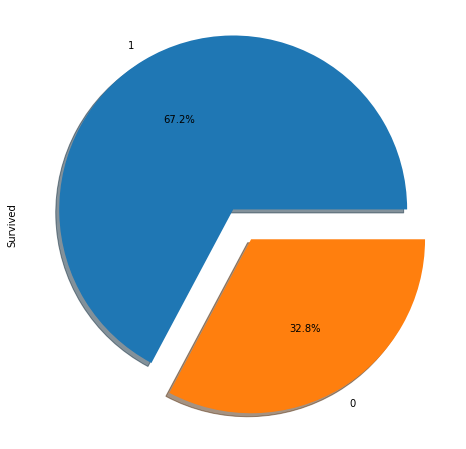

In [ ]:
# Pandas plotting with matplotlib
df['Survived'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

1. `Menampilkan prosentase nilai pada kolom target "Survived" menggunakan pie diagram, yang menunjukkan bahwa label 0 lebih banyak dari label 1, namun tidak terlalu imbalanced.`
2. `Note: jika data imbalanced dapat menyebabkan model cenderung memprediksi kelas mayoritas, hal ini ditangani dengan beberapa metode sampling/augmentasi data, seperti oversampling dan undersampling, serta dapat menggunakan model dengan pembobotan kelas dan dengan metrik AUC.` 

### Boxplot
[Deskripsi Boxplot](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

![image.png](https://miro.medium.com/max/656/1*2c21SkzJMf3frPXPAR_gZA.png)


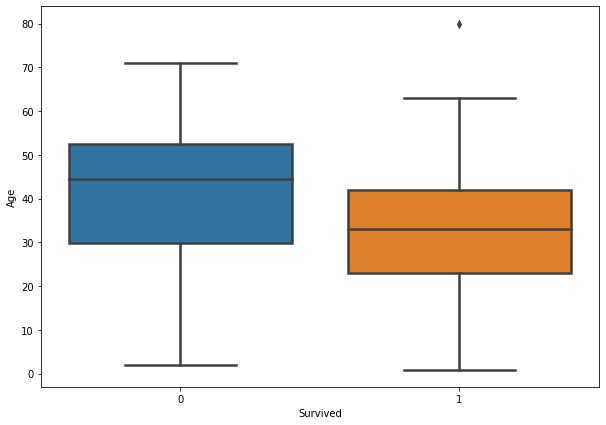

In [ ]:
# Seaborn with Matplotlib
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='Survived', y='Age', data=df, order=[0,1], linewidth=2.5)

1. `Menampilkan boxplot nilai "Age" untuk masing-masing label target, terlihat bahwa sebaran dalam IQR "Age" untuk masing-masing label hampir mirip`
2. `Terdapat beberapa data yang keluar dari sebaran (outlier)`

### Countplot and Barplot (with subplot)

`Countplot digunakan untuk menghitung jumlah sample, sedangkan Barplot salah satunya digunakan untuk menghitung rate/prosentase dari sample.`

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


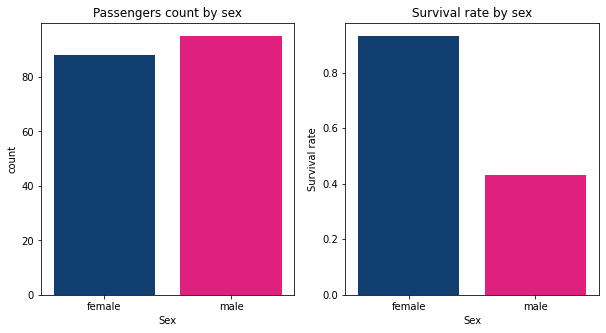

In [ ]:
fig, axarr = plt.subplots(1, 2, figsize=(10,5))
a = sns.countplot(df['Sex'], ax=axarr[0], palette=('#003f7f','#ff007f')).set_title('Passengers count by sex')
axarr[1].set_title('Survival rate by sex')
b = sns.barplot(x='Sex', y='Survived', data=df, palette=('#003f7f','#ff007f'), ci=None, ax=axarr[1]).set_ylabel('Survival rate')

1. `Terlihat sekitar 65% penumpang adalah laki-laki sedangkan 35% sisanya adalah perempuan.`
2. `Hal penting yang perlu diperhatikan di sini adalah bahwa tingkat kelangsungan hidup perempuan empat kali lipat tingkat kelangsungan hidup laki-laki dan ini menjadikan kolom Sex salah satu fitur yang paling informatif.`

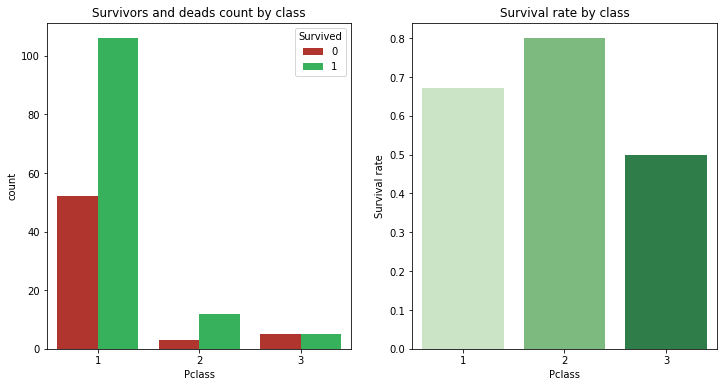

In [ ]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(x='Pclass', hue='Survived', data=df, palette=('#C52219', '#23C552'), ax=axarr[0]).set_title('Survivors and deads count by class')
ax=axarr[1].set_title('Survival rate by class')
b = sns.barplot(x='Pclass', y='Survived', data=df, palette="Greens", ci=None, ax=axarr[1]).set_ylabel('Survival rate')

1. `Ada tiga kelas (Pclass) di kapal dan dari plot tersebut terlihat bahwa jumlah penumpang di kelas tiga lebih banyak daripada jumlah penumpang gabungan kelas satu dan dua.`
2. `Namun, tingkat kelangsungan hidup berdasarkan kelas tidak sama, lebih dari 60% penumpang kelas satu dan sekitar setengah dari penumpang kelas dua berhasil diselamatkan, sedangkan 75% penumpang kelas tiga tidak dapat selamat dari bencana.`

Secara sederhana telah diberikan contoh EDA, dan data tersebut akan dilanjutkan ke encoding.

## Methods for Encoding [1](https://towardsdatascience.com/how-to-encode-categorical-data-d44dde313131) & [2](https://towardsdatascience.com/5-categorical-encoding-tricks-you-need-to-know-today-as-a-data-scientist-73cf75595298) Before Modeling


- **Label Encoding** adalah pengubahan label menjadi bentuk numerik untuk mengubahnya menjadi bentuk yang dapat dibaca mesin. Algoritma pembelajaran mesin kemudian dapat memutuskan dengan cara yang lebih baik tentang bagaimana label tersebut harus dioperasikan. 
- **One Hot Encoding** adalah proses yang dikenal sebagai pengkodean variabel kategori menjadi variabel dummy. Metode pengolahan data ini mengubah kolom kategorikal biner (yes / no, male / female,…) menjadi vektor biner 0/1 dimana 0 menunjukkan tidak adanya baris yang termasuk dalam kategori tersebut. Metode ini bisa rumit jika digunakan untuk variabel multidimensi non-biner yang akan menghasilkan penambahan kolom yang tidak berguna. Misalnya, jika kita memiliki kolom yang mewakili x warna, satu pengkodean panas akan menghasilkan x kolom tambahan (warna_hijau, warna_biru,…). 
- dll

In [ ]:
dataset = df.copy()
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
6,0,1,male,54.0,0,0,17463,51.8625,E46,S
10,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S
11,1,1,female,58.0,0,0,113783,26.5500,C103,S


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder() # method initialization

# Looping for columns except Survived
for c in dataset.columns[1:]:  
    if(dataset[c].dtype=='object'): # if column type = object (like "Tiket" and "Sex")
        dataset[c] = encoder.fit_transform(dataset[c])
    else: # else get the self column value without encode
        dataset[c] = dataset[c]

dataset.head()    

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,0,38.0,1,0,109,71.2833,72,0
3,1,1,0,35.0,1,0,31,53.1000,48,2
6,0,1,1,54.0,0,0,55,51.8625,117,2
10,1,3,0,4.0,1,1,120,16.7000,131,2
11,1,1,0,58.0,0,0,26,26.5500,43,2


- Kami menggunakan Label Encoding untuk mengubah tipe data kategorikal pada kolom Tiket dan Sex menjadi numerikal dengan angka acak 0-(jumlah_data_unik-1) 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# OneHot Encoding
encoder = OneHotEncoder() # method initialization
# Get all binary expanded columns from column Pclass
train_X_encoded = encoder.fit_transform(dataset[['Pclass']])

# Get all name expanded columns from column Pclass
column_name = encoder.get_feature_names(['Pclass'])

# Store to DataFrame
one_hot_encoded_frame =  pd.DataFrame(train_X_encoded.todense(), columns=column_name).astype(int) # Keep it on integer dtype

# Create the columns name on dataset, and drop the original Pclass column
dataset[column_name] = one_hot_encoded_frame
dataset = dataset.drop('Pclass', axis=1)

dataset.head() 

- Lalu kami memecah kolom Pclass menjadi kolom dengan data biner untuk setiap nilai yang ada di kolo Pclass menggunakan OneHot Encoder

# Introduction to Random Forest Algorithm with Python

Algoritma Random Forest adalah algoritma yang paling umum untuk digunakan dalam kompetisi ML seperti kompetisi Kaggle, Jika Anda pernah mencari algoritma ML yang mudah digunakan dan akurat, Anda kadang akan mendapatkan Random Forest di hasil teratas.
Untuk memahami algoritma Random forest, Anda harus terbiasa dengan Decision tree terlebih dahulu.

## Apa itu  Decision Tree?
*  Decision Tree adalah model prediksi yang menggunakan sekumpulan aturan biner untuk menghitung nilai target.
* Ada dua jenis pohon keputusan yaitu pohon klasifikasi dan regresi
pohon.
*  Decision Tree Classifier digunakan untuk membuat output berupa data kategorikal seperti keputusan ya dan tidak.
*  Decision Tree Regression digunakan untuk membuat output berupa data kontinu seperti nilai prosentase.
* Setiap Tree adalah model yang cukup sederhana yang memiliki branches, nodes and leaves.
* Node berisi atribut yang bergantung pada fungsi tujuan.

Sekarang setelah Anda terbiasa dengan Decision Tree, Anda siap untuk memahami Random Forest.

## Apa itu Random Forest?
Leo Breiman mendefinisikan itu pada [penelitiannya](https://medium.com/r/?url=https%3A%2F%2Fwww.stat.berkeley.edu%2F~breiman%2Frandomforest2001.pdf), “ Random forests adalah kombinasi prediktor pohon sehingga setiap pohon bergantung pada nilai vektor acak yang diambil sampelnya secara independen dan dengan distribusi yang sama untuk semua pohon di hutan ” 

Definisi lain “Random Forest adalah pengklasifikasi yang terdiri dari kumpulan pengklasifikasi pohon terstruktur {h(x,Θk ), k=1, ...} di mana {Θk} adalah vektor acak yang terdistribusi secara independen dan identik dan setiap pohon membentuk sebuah unit pilih kelas paling populer di input x ”
Singkatnya, Random forest membangun beberapa pohon keputusan dan menggabungkannya untuk mendapatkan prediksi yang lebih akurat dan stabil. 

## Keuntungan dari Random Forests 
* Dapat digunakan untuk masalah klasifikasi dan regresi
* Pengurangan overfitting: dengan rata-rata beberapa pohon, risiko overfitting jauh lebih rendah.
* Hutan acak membuat prediksi yang salah hanya jika lebih dari setengah pengklasifikasi dasar salah
* Sangat mudah untuk mengukur kepentingan relatif setiap fitur pada prediksi. Sklearn menyediakan pustaka untuk ini

Karena itu, ini lebih akurat daripada kebanyakan algoritma lainnya.

## Kerugian dari Random Forests
* Hutan acak telah diamati untuk menyesuaikan secara berlebihan beberapa set data dengan tugas klasifikasi / regresi yang berisik.
* Ini lebih kompleks dan mahal secara komputasi daripada algoritma pohon keputusan.

## Terminologi penting tentang Decision Trees dan Random Forest [[1]](https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/)
Mari kita lihat terminologi dasar yang digunakan dengan decision trees dan random forests :
1. Root Node: Ini mewakili seluruh populasi atau sampel dan ini selanjutnya dibagi menjadi dua atau lebih set homogen.
2. Splitting: Ini adalah proses membagi node menjadi dua atau lebih sub-node.
3. Decision Node: Ketika sebuah sub-node terpecah menjadi beberapa sub-node, maka itu disebut node keputusan.
4. Leaf/ Terminal Node: Node yang tidak terpecah disebut node Leaf atau Terminal.
5. Pruning: Saat kita menghapus sub-node dari simpul keputusan, proses ini disebut pemangkasan. Anda dapat mengatakan proses pemisahan yang berlawanan.
6. Branch / Sub-Tree: Sebuah sub-bagian dari seluruh pohon disebut cabang atau sub-tree.
7. Parent and Child Node: Node yang dibagi menjadi beberapa sub-node disebut node parent dari sub-node dimana sub-node adalah child dari node parent. 

Setelah kita mengetahui beberapa hal penting tentang random forest, mari kita gunakan algoritma ini di beberapa dataset, Dalam kasus kita, kita akan menggunakan   [Kaggle's titanic survivors dataset](https://www.kaggle.com/c/titanic/data).

Dan kemudian kami akan menggunakan neural network serta beberapa model lain untuk membandingkan hasilnya. 

## Import needed dependencies for modeling:

In [ ]:
from time import time
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint

In [ ]:
y = dataset['Survived']
X = dataset.drop(['Survived'], axis = 1)

# Split the dataset to trainand test data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=0)

- Split data dengan porsi data test 25%

## Set the parameters for the random forest model :

In [ ]:
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 50, 
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 6,
              'max_leaf_nodes': None}

## Hyperparameters of Sklearn Random forest classifier[[2]](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) :

*	**bootstrap** : boolean, optional (default=True)

> Whether bootstrap samples are used when building trees.

*	**min_samples_leaf** : int, float, optional (default=1)

> The minimum number of samples required to be at a leaf node:

> - If int, then consider min_samples_leaf as the minimum number.

> - If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

* **n_estimators** : integer, optional (default=10)
> The number of trees in the forest.

* 	**min_samples_split** :  int, float, optional (default=2)
> The minimum number of samples required to split an internal node:

> - If int, then consider min_samples_split as the minimum number.
> -	If float, then min_samples_split is a percentage and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

*	**max_features** : int, float, string or None, optional (default=”auto”)
> The number of features to consider when looking for the best split:

> -	If int, then consider max_features features at each split.
> -If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
> -	If “auto”, then max_features=sqrt(n_features).
> -	If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
> -	If “log2”, then max_features=log2(n_features).
> -	If None, then max_features=n_features.


*	**max_depth** :  integer or None, optional (default=None)
> The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.


*	**max_leaf_nodes** : int or None, optional (default=None)
> Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.


If you want to learn more about the rest of hyperparameters , check out  [sklearn.ensemble.RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

## Define the model :

In [ ]:
RF_model = RandomForestClassifier(**parameters)

## Train the model :

In [ ]:
RF_model.fit(train_X, train_y)

RandomForestClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=50)

## Test the trained model on test data :

In [ ]:
RF_predictions = RF_model.predict(test_X)

In [ ]:
score = accuracy_score(test_y ,RF_predictions)
print('Accuracy Random Forest Model:',score)

Accuracy Random Forest Model: 0.9130434782608695


## Using Neural Networks:


## Define the model :

In [ ]:
# Build a neural network :
NN_model = Sequential()

NN_model.add(Dense(256, input_dim = X.shape[1], activation='relu'))
NN_model.add(Dense(256, activation='relu'))
NN_model.add(Dense(256, activation='relu'))
NN_model.add(Dense(1, activation='sigmoid'))
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Define a checkpoint callback :

In [ ]:
checkpoint_name = 'BestWeights.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_accuracy', verbose = 1, save_best_only = True, mode ='max')
callbacks_list = [checkpoint]

## Train the model :

In [ ]:
t0_nn = time()
NN_model.fit(train_X, train_y, epochs=50, batch_size=64, validation_split = 0.2, callbacks=callbacks_list)
train_test_time = time() - t0_nn

Epoch 1/50
1/2 [==============>...............] - ETA: 5s - loss: 1.5360 - accuracy: 0.5625
Epoch 1: val_accuracy improved from -inf to 0.67857, saving model to BestWeights.hdf5
2/2 [==============================] - 6s 251ms/step - loss: 3.0944 - accuracy: 0.4587 - val_loss: 1.5885 - val_accuracy: 0.6786
Epoch 2/50
1/2 [==============>...............] - ETA: 0s - loss: 1.7857 - accuracy: 0.6562
Epoch 2: val_accuracy did not improve from 0.67857
2/2 [==============================] - 0s 36ms/step - loss: 2.8579 - accuracy: 0.6147 - val_loss: 2.2763 - val_accuracy: 0.6786
Epoch 3/50
1/2 [==============>...............] - ETA: 0s - loss: 3.0088 - accuracy: 0.5781
Epoch 3: val_accuracy did not improve from 0.67857
2/2 [==============================] - 0s 42ms/step - loss: 2.3130 - accuracy: 0.6514 - val_loss: 1.2387 - val_accuracy: 0.5000
Epoch 4/50
1/2 [==============>...............] - ETA: 0s - loss: 0.8950 - accuracy: 0.5625
Epoch 4: val_accuracy did not improve from 0.67857
2/2 [===

In [ ]:
# Load wights file of the best model :
wights_file = './BestWeights.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load weights
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Test the trained model on test data :

In [ ]:
predictions = NN_model.predict(test_X)

2/2 [==============================] - 0s 5ms/step


In [ ]:
# round predictions
rounded = [round(x[0]) for x in predictions]
predictions = rounded

In [ ]:
score = accuracy_score(test_y ,predictions)
print('Test Accuracy:',score)

Test Accuracy: 0.8043478260869565


## Comparision with other models

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# models
#from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
names = [ 'Gradient Boosting Classifier',
          'Extra Trees Classifier',
          'Bagging Classifier',
          'AdaBoost Classifier',
          'Gaussian NB',
          'XGB Classifier',
          'LGBM Classisfier',
          "Random Forest Classifier",
         ]
classifiers = [
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    BaggingClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    XGBClassifier(),
    LGBMClassifier(),
    RandomForestClassifier(),
        ]

# Zipped all architecture
zipped_clf = zip(names,classifiers)

In [ ]:
import warnings
# untuk menghapus warning
warnings.filterwarnings('ignore')

# fungsi accuracy testing 
def acc_summary(model, train_X, train_y, val_X, val_y):
    t0 = time()
    model.fit(train_X, train_y)
    pred_y = model.predict(val_X)
    train_test_time = time() - t0
    accuracy = accuracy_score(val_y, pred_y)*100
    print("accuracy : {0:.2f}%".format(accuracy))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time

# fungsi komparator
def classifier_comparator(train_X,train_y,val_X,val_y,classifier=zipped_clf):
    result = []
    for n,c in classifier:
      if n=='Neural Network': # for only neural network
        predictions = NN_model.predict(test_X)
        # round predictions
        rounded = [round(x[0]) for x in predictions]
        predictions = rounded
        score = accuracy_score(val_y, predictions)*100
        print("Test result for {}".format(n))
        print("train and test time: {0:.2f}s".format(train_test_time))
        print("accuracy : {0:.2f}%".format(score))
        print("-"*80)
        result.append((c,n,score,train_test_time))
      else:
        checker_pipeline = Pipeline([
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        #print(c)
        clf_acc,tt_time = acc_summary(checker_pipeline,train_X, train_y, val_X, val_y)
        result.append((c,n,clf_acc,tt_time))
    return result

In [ ]:
result = classifier_comparator(train_X, train_y, test_X, test_y)

Validation result for Gradient Boosting Classifier
accuracy : 80.43%
train and test time: 0.09s
--------------------------------------------------------------------------------
Validation result for Extra Trees Classifier
accuracy : 80.43%
train and test time: 0.13s
--------------------------------------------------------------------------------
Validation result for Bagging Classifier
accuracy : 78.26%
train and test time: 0.02s
--------------------------------------------------------------------------------
Validation result for AdaBoost Classifier
accuracy : 80.43%
train and test time: 0.09s
--------------------------------------------------------------------------------
Validation result for Gaussian NB
accuracy : 78.26%
train and test time: 0.01s
--------------------------------------------------------------------------------
Validation result for XGB Classifier
accuracy : 84.78%
train and test time: 0.04s
---------------------------------------------------------------------------

### Plotting

In [ ]:
# Plotting models
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# get name and score models
n = [v[1] for v in result]
s = [v[2] for v in result]

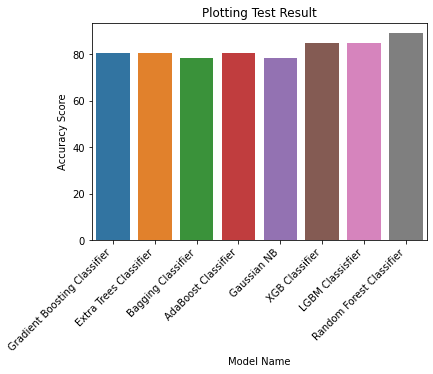

In [ ]:
# Visualisasi model
plt.figure()
sns.barplot(x = n, y = s)

plt.title("Plotting Test Result")
plt.xlabel('Model Name')

plt.xticks(rotation=45, ha='right', size=10)
plt.yticks(size=10)
plt.ylabel('Accuracy Score')

plt.show()

### Feature Importance

In [ ]:
# get best models [-1] is random forest and next [0] is index to model to get feature importance, and zipped with X column  
importances = sorted([(a,b) for a,b in zip(result[-1][0].feature_importances_, X.columns)],reverse=True)
n = [ni for si,ni in importances]
s = [si for si,ni in importances]

- Mengambil nilai fitur penting
- Pilih model:
  - result[-1][0] : random forest
  - result[-4][0] : lgb
  - result[-5][0] : xgb

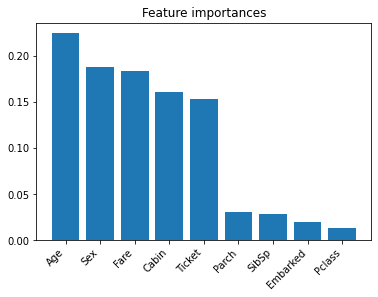

In [ ]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(n,s)
plt.xticks(rotation=45, ha='right', size=10)
plt.yticks(size=10)
plt.show()

### Ensemble Learning

In [ ]:
# Install and Import Dependencies
!pip install vecstack
from vecstack import stacking 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19879 sha256=f4a5a135ce3f89b0b53b75527541c5a6724dbdad75e34750fa08622d5343f4c9
  Stored in directory: /root/.cache/pip/wheels/7e/ee/d6/47cb94a403bc544de1433986e5530d6b0498021098fbe43aa1
Successfully built vecstack


In [ ]:
# get all models, 1-st level.
models = [v[0] for v in result[1:]] # tanpa neural network
print('Number of model:',len(models))

t0 = time()

# Compute stacking features
S_train, S_test = stacking(models, train_X, train_y, test_X, n_folds = 3, metric=accuracy_score,
                           shuffle = True, random_state = 7, verbose = 1)

# Initialize 2-nd level model
model = models[-1]

# Fit 2-nd level model
model = model.fit(S_train, train_y)

# Predict
y_test_pred = model.predict(S_test)

train_test_time = time() - t0

Number of model: 7
task:         [regression]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [7]

model  0:     [ExtraTreesClassifier]
    ----
    MEAN:     [0.70112721] + [0.04238257]
    FULL:     [0.70072993]

model  1:     [BaggingClassifier]
    ----
    MEAN:     [0.67165862] + [0.02928013]
    FULL:     [0.67153285]

model  2:     [AdaBoostClassifier]
    ----
    MEAN:     [0.69388084] + [0.04450450]
    FULL:     [0.69343066]

model  3:     [GaussianNB]
    ----
    MEAN:     [0.71561997] + [0.02823872]
    FULL:     [0.71532847]

model  4:     [XGBClassifier]
    ----
    MEAN:     [0.69355878] + [0.01525802]
    FULL:     [0.69343066]

model  5:     [LGBMClassifier]
    ----
    MEAN:     [0.69371981] + [0.04522008]
    FULL:     [0.69343066]

model  6:     [RandomForestClassifier]
    ----
    MEAN:     [0.69371981] + [0.03316136]
    FULL:     [0.69343066]



In [ ]:
## Print vecstack result 
accuracy = accuracy_score(test_y, y_test_pred)*100
print("Stacking accuracy : {0:.2f}%".format(accuracy))
print("train and test time: {0:.2f}s".format(train_test_time))

Stacking accuracy : 76.09%
train and test time: 1.58s


## References :
* [The Random Forest Algorithm](https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd)
*	[What are some advantages of using a random forest over a decision tree given that a decision tree is simpler?](https://www.quora.com/What-are-some-advantages-of-using-a-random-forest-over-a-decision-tree-given-that-a-decision-tree-is-simpler)
*	[A Complete Tutorial on Tree Based Modeling from Scratch](https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/)
*	[Sklearn documents of random forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* [ImageSource](https://cdn5.vectorstock.com/i/1000x1000/88/99/city-and-forest-vector-1078899.jpg)
* [Kaggle - All Classification Models](https://www.kaggle.com/backagain/all-classification-models-eda-pandas-profiling)

